<a href="https://colab.research.google.com/github/dnlgnwn-wq/Kelompok3_RandomForest_MachineLearning/blob/main/DanielGunawan_RandomForest_ModelBMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier   # 🔹 Ganti ke Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **LOAD DATASET**

In [2]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())


5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### **CEK INFO DATASET**

In [3]:

print("\nInformasi dataset:")
df.info()
print("\nCek nilai kosong:")
print(df.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB

Cek nilai kosong:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


### **PRA-PEMROSESAN DATASET**

In [5]:
# Hapus baris kosong
df = df.dropna()

# Pisahkan label (y) dan fitur (X)
y = df['model']
X = df.drop(columns=['model'])

# Ubah kolom kategorikal di fitur menjadi numerik (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)
print("\nFitur setelah encoding:")
display(X.head())


Fitur setelah encoding:


,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,False,False,False,False,False,False
1,2018,27000,14827,145,42.8,2.0,False,False,False,False,False,True
2,2016,16000,62794,160,51.4,3.0,False,False,False,False,False,False
3,2017,12750,26676,145,72.4,1.5,False,False,False,False,False,False
4,2014,14500,39554,160,50.4,3.0,False,False,False,False,False,False


### **SPLIT DATA (TRAIN DAN TEST)**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **BUAT DAN LATIH MODEL RANDOM FOREST**

In [7]:
model = RandomForestClassifier(
    n_estimators=100,        # 🔹 jumlah pohon dalam hutan
    criterion='entropy',     # 🔹 sama seperti Decision Tree
    max_depth=6,             # 🔹 batas kedalaman tiap pohon
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)

### **PREDIKSI DAN EVALUASI TABEL**


🎯 Akurasi Model Random Forest: 47.29%

📊 Classification Report:
              precision    recall  f1-score   support

    1 Series       0.61      0.66      0.64       374
    2 Series       0.61      0.19      0.29       232
    3 Series       0.35      0.89      0.50       485
    4 Series       0.58      0.09      0.15       207
    5 Series       0.73      0.18      0.28       211
    6 Series       0.00      0.00      0.00        19
    7 Series       1.00      0.04      0.07        26
    8 Series       0.00      0.00      0.00         6
          M2       0.00      0.00      0.00         6
          M3       1.00      0.40      0.57         5
          M4       0.49      0.96      0.65        27
          M5       0.50      0.43      0.46         7
          M6       0.00      0.00      0.00         4
          X1       1.00      0.04      0.07       170
          X2       0.52      0.25      0.34        59
          X3       0.90      0.62      0.73       123
          X4    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


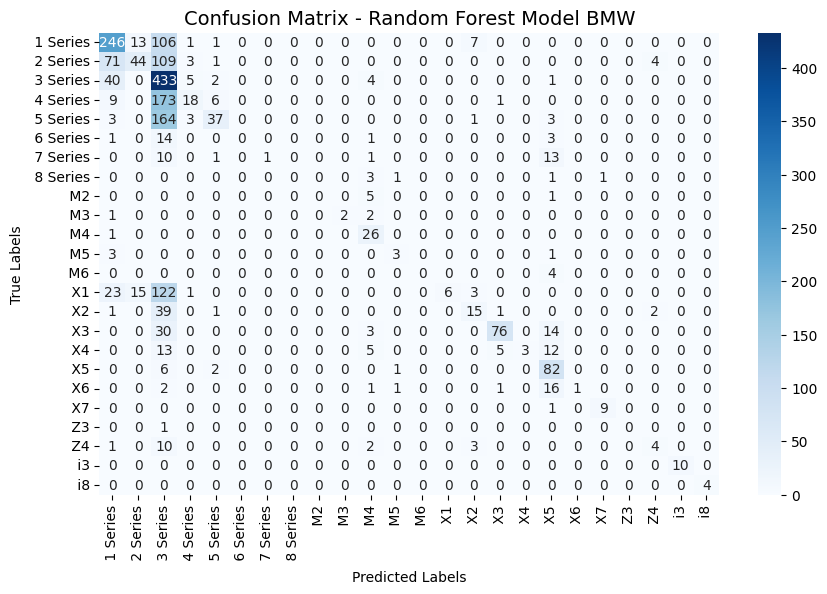

In [8]:
y_pred = model.predict(X_test)

# Hitung akurasi dalam persen
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\n🎯 Akurasi Model Random Forest: {accuracy:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix (angka):")
print(cm)

# ==========================================
# 🔍 Visualisasi Confusion Matrix
# ==========================================
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Model BMW", fontsize=14)
plt.show()

### **VISUALISASI SALAH SATU DECISION TREE DALAM RANDOM FOREST**

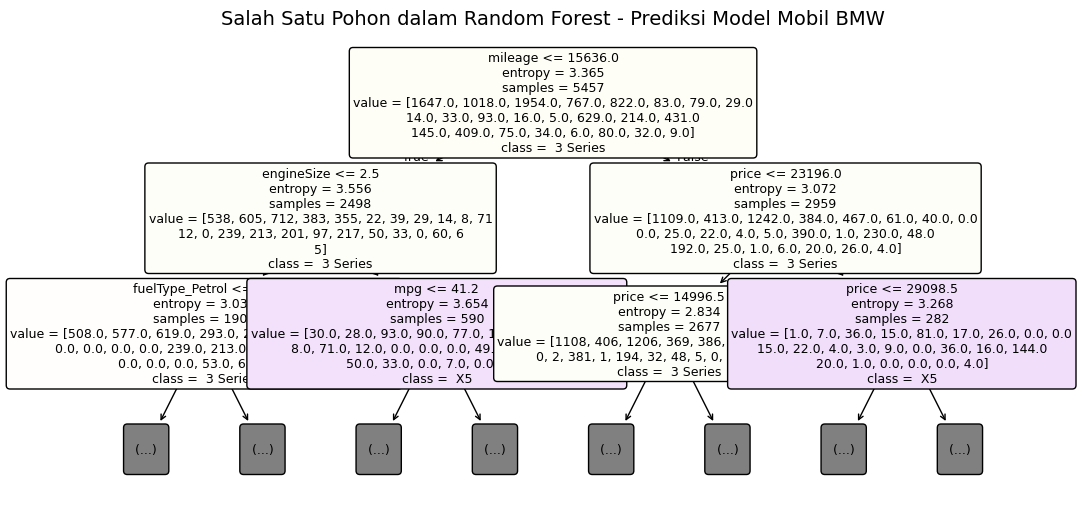

In [9]:
from sklearn.tree import plot_tree

# Tampilkan salah satu pohon (misalnya pohon ke-0)
plt.figure(figsize=(12, 6))
plot_tree(
    model.estimators_[0],      # 🔹 ambil pohon pertama
    filled=True,
    feature_names=X.columns,
    class_names=model.classes_,
    rounded=True,
    fontsize=9,
    max_depth=2
)
plt.title("Salah Satu Pohon dalam Random Forest - Prediksi Model Mobil BMW", fontsize=14, pad=15)
plt.show()

### **INPUTAN DARI USER UNTUK PREDIKSI MODEL MOBIL**

In [10]:
print("==== PREDIKSI MANUAL ====\n")

# Input dari pengguna
tahun = int(input("Masukkan tahun mobil: "))
harga = float(input("Masukkan harga mobil (mata uang Inggris (£)): "))
transmisi = input("Masukkan jenis transmisi (Manual / Automatic / Semi-Auto): ").lower()
jarak_tempuh = float(input("Masukkan jarak tempuh (mileage): "))
bahan_bakar = input("Masukkan jenis bahan bakar (Petrol / Diesel / Hybrid / Electric / Other): ").lower()
pajak = float(input("Masukkan pajak kendaraan (tax (mata uang Inggris (£))): "))
konsumsi_bbm = float(input("Masukkan konsumsi bahan bakar (mpg - mil per galon bahan bakar): "))
ukuran_mesin = float(input("Masukkan ukuran mesin (engineSize): "))

# Buat DataFrame satu baris untuk prediksi
user_input = pd.DataFrame({
    "year": [tahun],
    "price": [harga],
    "transmission": [transmisi],
    "mileage": [jarak_tempuh],
    "fuelType": [bahan_bakar],
    "tax": [pajak],
    "mpg": [konsumsi_bbm],
    "engineSize": [ukuran_mesin]
})

# Encoding kolom kategorikal agar sesuai model
user_input = pd.get_dummies(user_input)
user_input = user_input.reindex(columns=X.columns, fill_value=0)

# Prediksi menggunakan model Random Forest
prediksi = model.predict(user_input)[0]

print(f"\n🚗 Prediksi Model Mobil BMW (Random Forest): {prediksi}")

==== PREDIKSI MANUAL ====

Masukkan tahun mobil: 2020
Masukkan harga mobil (mata uang Inggris (£)): 234000
Masukkan jenis transmisi (Manual / Automatic / Semi-Auto): SEMI-AUTO
Masukkan jarak tempuh (mileage): 20000
Masukkan jenis bahan bakar (Petrol / Diesel / Hybrid / Electric / Other): other
Masukkan pajak kendaraan (tax (mata uang Inggris (£))): 200
Masukkan konsumsi bahan bakar (mpg - mil per galon bahan bakar): 20.0
Masukkan ukuran mesin (engineSize): 1.5

🚗 Prediksi Model Mobil BMW (Random Forest):  1 Series


### **PERBANDINGAN TINGKAT AKURASI DARI 3 MODEL**

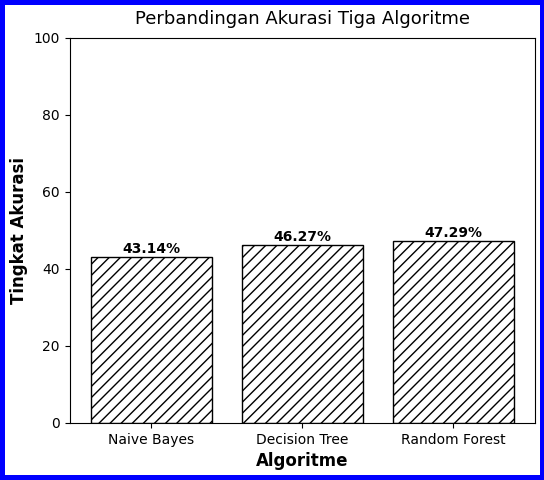

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data model dan akurasinya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
accuracy_values = [43.14, 46.27, 47.29]  # 🔹 ganti sesuai hasil modelmu (%)

# Warna dan pola batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, accuracy_values, color='white', edgecolor='black', hatch='///')

# Tampilkan nilai di atas batang
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{acc:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Atur tampilan grafik
plt.ylim(0, 100)
plt.ylabel("Tingkat Akurasi", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Akurasi Tiga Algoritme", fontsize=13, pad=10)

# Hilangkan background
plt.gca().set_facecolor('white')
plt.grid(False)

# Tambahkan border luar seperti contoh
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

plt.show()

### **PERBANDINGAN NILAI PRECISION DARI 3 MODEL**

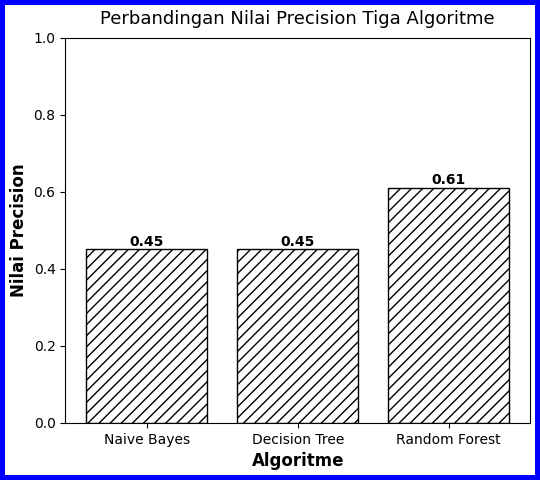

In [12]:
# Data model dan precision-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
precision_values = [0.45, 0.45, 0.61]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, precision_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai precision di atas setiap batang
for bar, val in zip(bars, precision_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena precision antara 0–1
plt.ylabel("Nilai Precision", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Precision Tiga Algoritme", fontsize=13, pad=10)

# Mengatur gaya agar mirip contohmu
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

### **PERBANDINGAN NILAI RECALL DARI 3 MODEL**

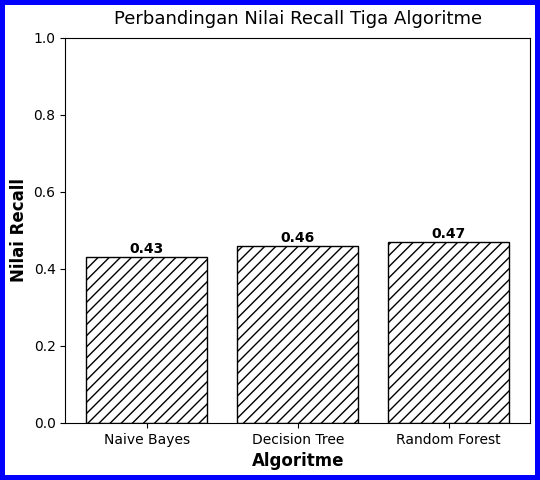

In [13]:
# Data model dan recall-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
recall_values = [0.43, 0.46, 0.47]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, recall_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai recall di atas setiap batang
for bar, val in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena recall antara 0–1
plt.ylabel("Nilai Recall", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Recall Tiga Algoritme", fontsize=13, pad=10)

# Gaya mirip contoh
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

### **PERBANDINGAN NILAI F1-SCORE DARI 3 MODEL**

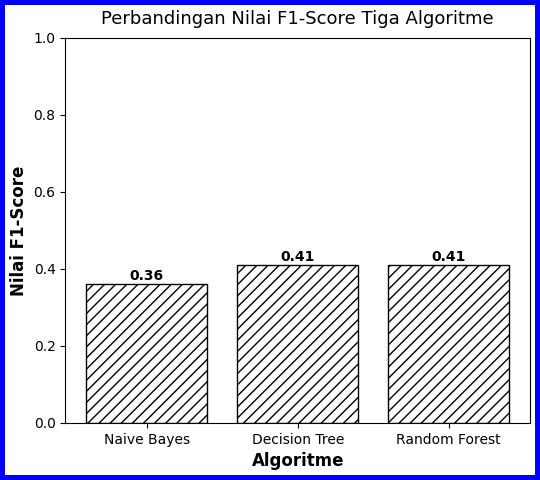

In [14]:
# Data model dan F1-Score-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
f1_values = [0.36, 0.41, 0.41]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, f1_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai F1-Score di atas setiap batang
for bar, val in zip(bars, f1_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena F1-Score antara 0–1
plt.ylabel("Nilai F1-Score", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai F1-Score Tiga Algoritme", fontsize=13, pad=10)

# Gaya mirip contoh sebelumnya
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

### **MENGHITUNG WAKTU EKSEKUSI**

In [15]:
start_time = time.time()

model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"\n⏱️ Waktu eksekusi Random Forest: {execution_time:.4f} detik")


⏱️ Waktu eksekusi Random Forest: 4.7742 detik


### **HASIL AKHIR**

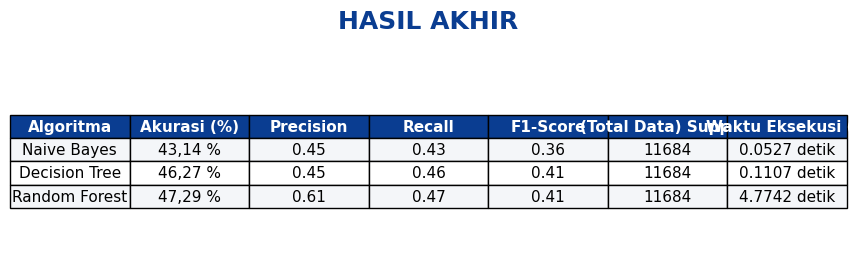

In [18]:
# Data hasil akhir dari tiga model
data = {
    'Algoritma': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Akurasi (%)': ['43,14 %', '46,27 %', '47,29 %'],
    'Precision': [0.45, 0.45, 0.61],
    'Recall': [0.43, 0.46, 0.47],
    'F1-Score': [0.36, 0.41, 0.41],
    '(Total Data) Support': [11684, 11684, 11684],
    'Waktu Eksekusi (s)': ['0.0527 detik', '0.1107 detik', '4.7742 detik']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# ==========================================
# 🔹 VISUALISASI TABEL DENGAN MATPLOTLIB
# ==========================================
fig, ax = plt.subplots(figsize=(9, 2.8))
ax.axis('off')

# Header besar di atas tabel
plt.text(0.5, 1.15, 'HASIL AKHIR', ha='center', va='center',
         fontsize=18, fontweight='bold', color='#0A3D91')

# Membuat tabel
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Gaya tabel
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.4)

# Warna header
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header baris
        cell.set_facecolor('#0A3D91')  # Biru gelap
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor('#F4F6F9')  # Abu muda
        if row % 2 == 0:
            cell.set_facecolor('#FFFFFF')  # Selang-seling putih

# Border tabel luar
for pos in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[pos].set_color('#0A3D91')
    plt.gca().spines[pos].set_linewidth(6)

plt.show()